In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
# 路径
Path={}
for i in range(1,5):
    Path["train"+str(i)]="./train_FD00"+str(i)+".txt"
    Path["test"+str(i)]="./test_FD00"+str(i)+".txt"
    Path["real"+str(i)]="./RUL_FD00"+str(i)+".txt"


In [4]:
data_matrices={}
for i in range(1,5):
    data_matrices["train"+str(i)]=np.loadtxt(Path["train"+str(i)],dtype=np.float32,unpack=False)
    data_matrices["test"+str(i)]=np.loadtxt(Path["test"+str(i)],dtype=np.float32,unpack=False)
    data_matrices["real"+str(i)]=np.loadtxt(Path["real"+str(i)],dtype=np.float32,unpack=False)

In [5]:
data_matrices["train1"].shape,data_matrices["test1"].shape,data_matrices["real1"].shape

((20631, 26), (13096, 26), (100,))

In [6]:
# 分离每个机组的数据
data={}
for i in range(1,5):
    data["train"+str(i)+"num"]=0
    datamatrix=data_matrices["train"+str(i)]
    low,high=0,0
    for row in range(0,datamatrix.shape[0]):
        # 更新总机组数 & 存入之前的数据矩阵
        if datamatrix[row][0] > data["train"+str(i)+"num"] or row == datamatrix.shape[0]-1:
            # 最后一个数据
            if row == datamatrix.shape[0]-1:
                high=row+1
                #机组矩阵(X)
                data["train"+str(i)+"X"+str(data["train"+str(i)+"num"])
                     ] = datamatrix[low:high][:]
                #标签(Y)
                data["train"+str(i)+"Y"+str(data["train"+str(i)+"num"])
                     ] = high-low
                #print(high-low)
                #print(datamatrix[low:high][:].shape)
                continue
            if row!=0:
                high=row
                #机组矩阵(X)
                data["train"+str(i)+"X"+str(data["train"+str(i)+"num"])
                     ] = datamatrix[low:high][:]
                #标签(Y)
                data["train"+str(i)+"Y"+str(data["train"+str(i)+"num"])
                     ] = high-low
                #print(high- low)
                #print(datamatrix[low:high][:].shape)
                low=row
            data["train"+str(i)+"num"] += 1
    #print(data["train"+str(i)+"num"])
            
        

In [15]:
data["train1X1"].shape

(192, 26)

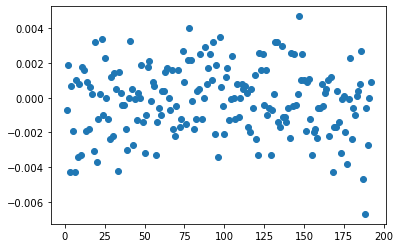

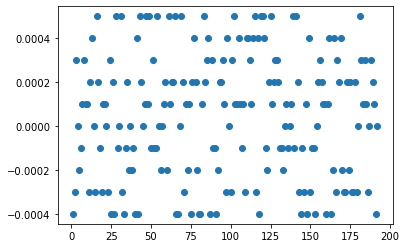

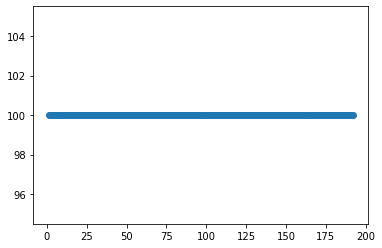

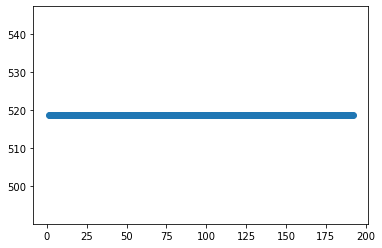

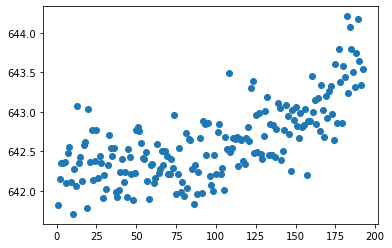

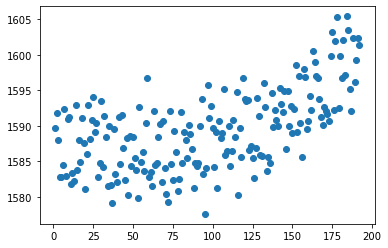

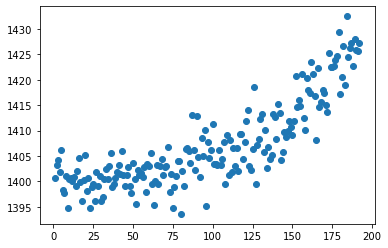

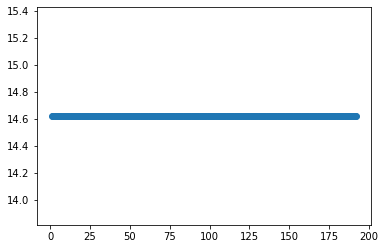

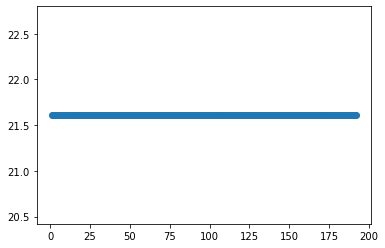

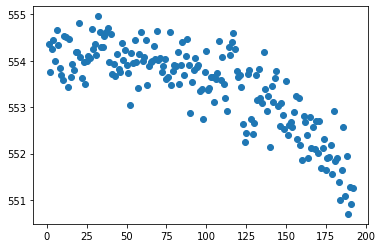

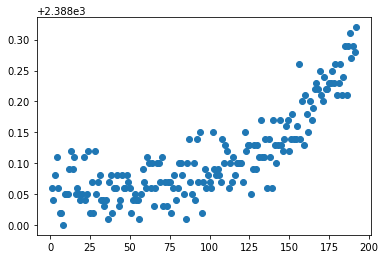

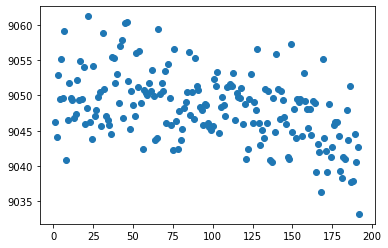

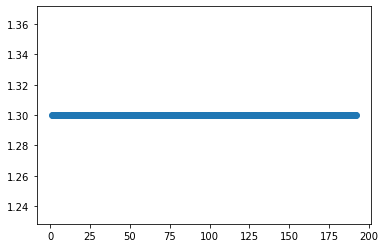

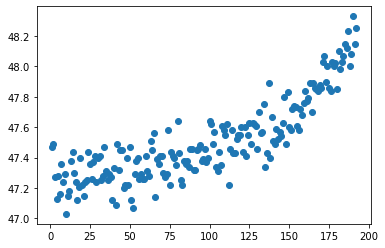

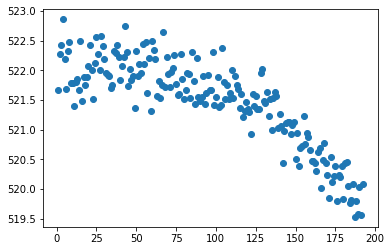

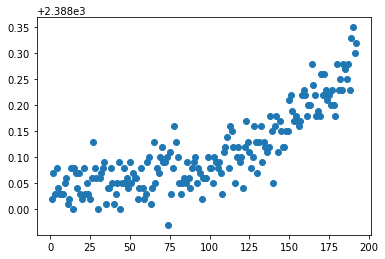

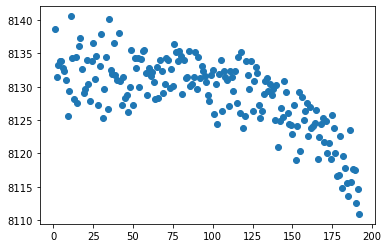

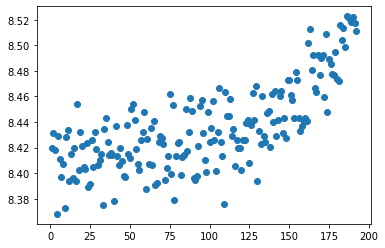

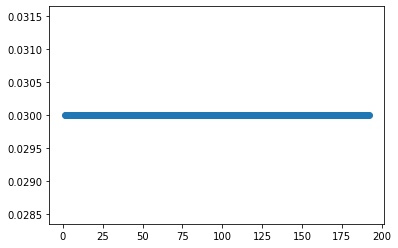

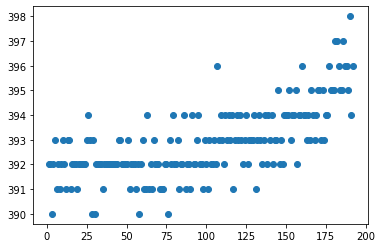

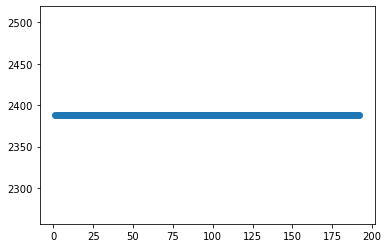

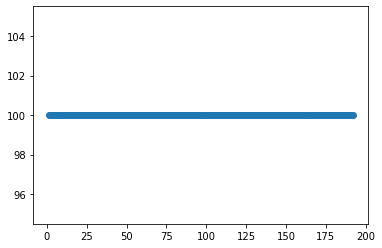

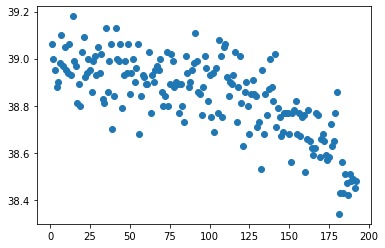

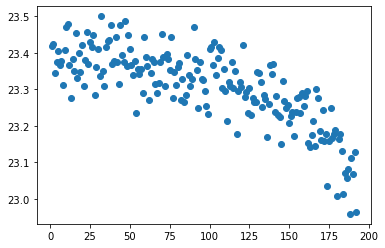

In [29]:
for i in range(1,data["train1num"]+1):
    Y=data["train1Y"+str(i)]
    X=data["train1X"+str(i)]
    index_X=np.array(range(1,Y+1))
    if i==1:
        for j in range(2,26):
            plt.scatter(index_X,X[:,j])
            plt.show()

# Train 1X1 的可视化数据

seq_tensor_shape= torch.Size([15631, 1, 50, 25])
torch.Size([1, 50, 25])
label= tensor([0.4534, 0.4502, 0.4469, 0.4437, 0.4405, 0.4373, 0.4341, 0.4309, 0.4277,
        0.4244, 0.4212, 0.4180, 0.4148, 0.4116, 0.4084, 0.4051, 0.4019, 0.3987,
        0.3955, 0.3923, 0.3891, 0.3859, 0.3826, 0.3794, 0.3762, 0.3730, 0.3698,
        0.3666, 0.3633, 0.3601, 0.3569, 0.3537, 0.3505, 0.3473, 0.3441, 0.3408,
        0.3376, 0.3344, 0.3312, 0.3280, 0.3248, 0.3215, 0.3183, 0.3151, 0.3119,
        0.3087, 0.3055, 0.3023, 0.2990, 0.2958, 0.2926, 0.2894, 0.2862, 0.2830,
        0.2797, 0.2765, 0.2733, 0.2701, 0.2669, 0.2637, 0.2605, 0.2572, 0.2540,
        0.2508, 0.2476, 0.2444, 0.2412, 0.2379, 0.2347, 0.2315, 0.2283, 0.2251,
        0.2219, 0.2186, 0.2154, 0.2122, 0.2090, 0.2058, 0.2026, 0.1994, 0.1961,
        0.1929, 0.1897, 0.1865, 0.1833, 0.1801, 0.1768, 0.1736, 0.1704, 0.1672,
        0.1640, 0.1608, 0.1576, 0.1543, 0.1511, 0.1479, 0.1447, 0.1415, 0.1383,
        0.1350, 0.1318, 0.1286, 0.1254, 

c:\ProgramData\Anaconda3\envs\ogb\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


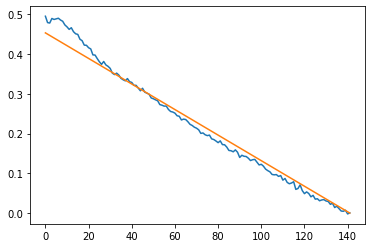

In [31]:
# 训练
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn import preprocessing
import numpy as np
import torch.utils.data as Data
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(2020)

# train_dr.shape=(20631, 28)
train_df = pd.read_csv('train_FD001.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1,
              inplace=True)  # 去掉26,27列并用新生成的数组替换原数组
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5',
                    's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17',
                    's18', 's19', 's20', 's21']
# 先按照'id'列的元素进行排序，当'id'列的元素相同时按照'cycle'列进行排序
train_df = train_df.sort_values(['id', 'cycle'])

test_df = pd.read_csv('test_FD001.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5',
                   's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17',
                   's18', 's19', 's20', 's21']

truth_df = pd.read_csv('RUL_FD001.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)

"""Data Labeling - generate column RUL"""
# 按照'id'来进行分组，并求出每个组里面'cycle'的最大值,此时它的索引列将变为id
# 所以用reset_index()将索引列还原为最初的索引
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
# 将rul通过'id'合并到train_df上，即在相同'id'时将rul里的max值附在train_df的最后一列
train_df = train_df.merge(rul, on=['id'], how='left')
# 加一列，列名为'RUL'
train_df['RUL'] = train_df['max'] - train_df['cycle']
# 将'max'这一列从train_df中去掉
train_df.drop('max', axis=1, inplace=True)


"""MinMax normalization train"""
# 将'cycle'这一列复制给新的一列'cycle_norm'
train_df['cycle_norm'] = train_df['cycle']
# 在列名里面去掉'id', 'cycle', 'RUL'这三个列名
cols_normalize = train_df.columns.difference(['id', 'cycle', 'RUL'])
# 对剩下名字的每一列分别进行特征放缩
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]),
                             columns=cols_normalize,
                             index=train_df.index)
# 将之前去掉的再加回特征放缩后的列表里面
join_df = train_df[train_df.columns.difference(
    cols_normalize)].join(norm_train_df)
# 恢复原来的索引
train_df = join_df.reindex(columns=train_df.columns)

"""MinMax normalization test"""
# 与上面操作相似，但没有'RUL'这一列
test_df['cycle_norm'] = test_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]),
                            columns=cols_normalize,
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(
    cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns=test_df.columns)
test_df = test_df.reset_index(drop=True)


"""generate column max for test data"""
# 第一列是id，第二列是同一个id对应的最大cycle值
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
# 将列名改为id和max
rul.columns = ['id', 'max']
# 给rul文件里的数据列命名为'more'
truth_df.columns = ['more']
# 给truth_df增加id列，值为truth_df的索引加一
truth_df['id'] = truth_df.index + 1
# 给truth_df增加max列，值为rul的max列值加truth_df的more列,
# truth_df['max']的元素是测试集里面每个id的最大cycle值加rul里每个id的真实剩余寿命
truth_df['max'] = rul['max'] + truth_df['more']
# 将'more'这一列从truth_df中去掉
truth_df.drop('more', axis=1, inplace=True)

test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)

sequence_length = 50


def gen_sequence(id_df, seq_length, seq_cols):

    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements - seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

sensor_cols = ['s' + str(i) for i in range(1, 22)]
sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols.extend(sensor_cols)

val = list(gen_sequence(
    train_df[train_df['id'] == 1], sequence_length, sequence_cols))
val_array = np.array(val)  # val_array.shape=(142, 50, 25)  142=192-50

seq_gen = (list(gen_sequence(train_df[train_df['id'] == id], sequence_length, sequence_cols))
           for id in train_df['id'].unique())
seq_array = np.concatenate(list(seq_gen)).astype(
    np.float32)  # seq_array.shape=(15631, 50, 25)
seq_tensor = torch.tensor(seq_array)
seq_tensor = seq_tensor.view(15631, 1, 50, 25).to(device)
print("seq_tensor_shape=", seq_tensor.shape)
print(seq_tensor[0].shape)


"""generate labels"""


def gen_labels(id_df, seq_length, label):

    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]


label_gen = [gen_labels(train_df[train_df['id'] == id], sequence_length, ['RUL'])
             for id in train_df['id'].unique()]

label_array = np.concatenate(label_gen).astype(
    np.float32)  # label_array.shape=(15631, 1)
label_scale = (label_array-np.min(label_array)) / \
               (np.max(label_array)-np.min(label_array))

label_tensor = torch.tensor(label_scale)
label_tensor = label_tensor.view(-1)
label_tensor = label_tensor.to(device)
print("label=", label_tensor[:142])


num_sample = len(label_array)
print("num_sample=", num_sample)
input_size = seq_array.shape[2]
hidden_size = 100
num_layers = 2


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            torch.nn.Conv2d(  # 输入conv1的形状(50, 1, 50, 25)-->输出conv1的形状(50, 20, 26, 13)
                in_channels=1,  # 输入卷积层的图片通道数
                out_channels=20,  # 输出的通道数
                kernel_size=3,  # 卷积核的大小，长宽相等
                stride=1,  # 滑动步长为1
                padding=2  # 给输入矩阵周围添两圈0,这样的话在卷积核为3*3时能将输入矩阵的所有元素考虑进去
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # 将conv1的输出flatten后为(50, 20*26*13)-->经过全连接变为(50, 1)
        self.fc = nn.Linear(20*26*13, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.size(0), -1)  # 将conv1的输出flatten
        # x, _ = self.lstm2(x)
        x = self.fc(x)
        return x


cnn = CNN().to(device)
print(cnn)

# optimize all cnn parameters
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.01)
loss_func = nn.MSELoss()   # the target label is not one-hotted

for epoch in range(20):
    for i in range(0, 142):   # 分配 batch data, normalize x when iterate train_loader
        b_x = seq_tensor[i].view(1, 1, 50, 25)
        b_y = label_tensor[i]
        output = cnn(b_x)               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        output_sum = output

output = cnn(seq_tensor[0:192-50])   # 将第一个sample放进去
output = output.cpu().detach().numpy()
label_array = label_tensor[0:192-50].cpu().detach().numpy()
plt.plot(output)
plt.plot(label_array)
plt.show()




